In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
import cv2
import seaborn as sns

import os
import shutil
import imutils

%matplotlib inline
plt.style.use('ggplot')

In [3]:
# changing files name in Yes directory

folder = 'dataset/brain_tumor_dataset/yes/'  # Define the path to the folder containing files
count = 1  # Initialize a counter to keep track of the new filenames

# Loop through each file in the specified folder
for filename in os.listdir(folder):
    source = folder + filename  # Create the full path to the current file
    destination = folder + "Y_" + str(count) + ".jpg"  # Create the new file name with a sequential number
    os.rename(source, destination)  # Rename the file from the old name to the new name
    count += 1  # Increment the counter for the next file

print("All files are renamed in Yes directory")  # Print a message indicating that renaming is complete

All files are renamed in Yes directory


In [4]:
# changing files name in No directory

folder = 'dataset/brain_tumor_dataset/no/'  # Define the path to the folder containing files
count = 1  # Initialize a counter to keep track of the new filenames

# Loop through each file in the specified folder
for filename in os.listdir(folder):
    source = folder + filename  # Create the full path to the current file
    destination = folder + "N_" + str(count) + ".jpg"  # Create the new file name with a sequential number
    os.rename(source, destination)  # Rename the file from the old name to the new name
    count += 1  # Increment the counter for the next file

print("All files are renamed in No directory")  # Print a message indicating that renaming is complete

All files are renamed in No directory


### Exploratory Data Analysis (EDA)

In [5]:
# Get the list of files in the 'yes' directory
yes_list = os.listdir("dataset/brain_tumor_dataset/yes/")  
# Calculate the total number of files in the 'yes' directory
number_yes_files = len(yes_list)  
# Print the total number of files in the 'yes' directory
print("Total number of yes files in yes directory: " + str(number_yes_files))  

# Get the list of files in the 'no' directory
no_list = os.listdir("dataset/brain_tumor_dataset/no/")  
# Calculate the total number of files in the 'no' directory
number_no_files = len(no_list)  
# Print the total number of files in the 'no' directory
print("Total number of no files in no directory: " + str(number_no_files))  

Total number of yes files in yes directory: 155
Total number of no files in no directory: 98


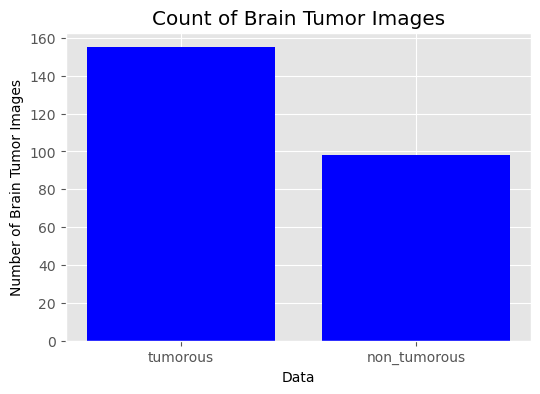

In [6]:
# Create a dictionary with the number of images for each category
data = {'tumorous': number_yes_files, 'non_tumorous': number_no_files}

# Get the keys (categories) and values (counts) from the dictionary
typex = data.keys()  
values = data.values()

# Create a new figure with a specified size
figure = plt.figure(figsize=(6, 4))

# Create a bar chart with the categories on the x-axis and counts on the y-axis
plt.bar(typex, values, color='blue')  

# Label the x-axis
plt.xlabel("Data")  
# Label the y-axis
plt.ylabel("Number of Brain Tumor Images")  
# Set the title of the chart
plt.title('Count of Brain Tumor Images')  
# Display the plot
plt.show()  

### Data Augmentation

In [2]:
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [11]:
def timing(sec_elapsed):
    # Calculate the number of hours by dividing the total seconds by 3600 (60 * 60)
    h = int(sec_elapsed / (60 * 60))  
    
    # Calculate the number of minutes by first finding the remainder of seconds after removing hours
    # Then divide by 60 to get minutes
    m = int(sec_elapsed % (60 * 60) / 60)  
    
    # Calculate the number of seconds remaining after removing hours and minutes
    s = sec_elapsed % 60  
    
    # Format the time as a string in the format "hours:minutes:seconds"
    return f"{h}:{m}:{s}"  

In [12]:
#'dataset/brain_tumor_dataset/yes/Y_1.jpg'
#N, WIDTH, HEIGHT, CHANNEL

In [13]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    # Initialize ImageDataGenerator with various augmentation parameters
    data_get = ImageDataGenerator(
        rotation_range=10,  # Randomly rotate images by up to 10 degrees
        width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the width
        height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the height
        shear_range=0.1,  # Apply random shear transformations
        brightness_range=(0.3, 1.0),  # Randomly change the brightness of images
        horizontal_flip=True,  # Randomly flip images horizontally
        vertical_flip=True,  # Randomly flip images vertically
        fill_mode='nearest'  # Fill in newly created pixels with the nearest pixel values
    )
    
    # Loop through each file in the specified directory
    for filename in os.listdir(file_dir):
        # Read the image file
        image = cv2.imread(file_dir + '/' + filename)  
        # Reshape the image to be compatible with ImageDataGenerator
        image = image.reshape((1,) + image.shape)  
        # Define a prefix for the augmented images
        save_prefix = 'aug_' + filename[:-4]  
        i = 0  # Initialize a counter for generated samples
        
        # Generate augmented images and save them to the specified directory
        for batch in data_get.flow(
            x=image,  # Input image
            batch_size=1,  # Generate one augmented image at a time
            save_to_dir=save_to_dir,  # Directory to save augmented images
            save_prefix=save_prefix,  # Prefix for saved images
            save_format='jpg'  # Format of saved images
        ):
            i += 1  # Increment the counter
            
            # Stop generating images if the number of generated samples exceeds the specified limit
            if i > n_generated_samples:
                break

In [14]:
import time  # Import time module to measure execution time

# Record the start time of the execution
start_time = time.time()  

# Define paths to the directories for 'yes' and 'no' images
yes_path = 'dataset/brain_tumor_dataset/yes'
no_path = 'dataset/brain_tumor_dataset/no'

# Define the path where augmented images will be saved
augmented_data_path = 'dataset/augmented_dataset/'

# Call the augmented_data function to generate and save augmented images for 'yes' images
augmented_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')

# Call the augmented_data function to generate and save augmented images for 'no' images
augmented_data(file_dir=no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

# Record the end time of the execution
end_time = time.time()  

# Calculate the execution time by finding the difference between end time and start time
execution_time = end_time - start_time

# Print the execution time formatted as hours:minutes:seconds
print(timing(execution_time))  

0:2:5.201932907104492


In [15]:
def data_summary(main_path):
    # Define paths to the directories for 'yes' (positive) and 'no' (negative) images
    yes_path = 'dataset/augmented_dataset/yes'
    no_path = 'dataset/augmented_dataset/no'
    
    # Count the number of files in each directory
    no_pos = len(os.listdir(yes_path))  # Number of positive samples
    no_neg = len(os.listdir(no_path))  # Number of negative samples
    
    # Calculate the total number of samples
    n = no_pos + no_neg  
    
    # Calculate the percentage of positive samples
    pos_percent = (no_pos * 100) / n  
    
    # Calculate the percentage of negative samples
    neg_percent = (no_neg * 100) / n  
    
    # Print the total number of samples
    print(f"Number of Sample: {n}")  
    
    # Print the number and percentage of positive samples
    print(f"{no_pos} Number of Positive Sample in Percentage: {pos_percent}%")  
    
    # Print the number and percentage of negative samples
    print(f"{no_neg} Number of Negative Sample in Percentage: {neg_percent}%")  

In [16]:
data_summary(augmented_data_path)

Number of Sample: 2064
1085 Number of Positive Sample in Percentage: 52.56782945736434%
979 Number of Negative Sample in Percentage: 47.43217054263566%


In [17]:
# Get the list of files in the 'yes' directory of the augmented dataset
yes_list = os.listdir("dataset/augmented_dataset/yes/")  
# Calculate the total number of files in the 'yes' directory
number_yes_files = len(yes_list)  
# Print the total number of files in the 'yes' directory
print("Total number of yes files in yes directory: " + str(number_yes_files))  

# Get the list of files in the 'no' directory of the augmented dataset
no_list = os.listdir("dataset/augmented_dataset/no/")  
# Calculate the total number of files in the 'no' directory
number_no_files = len(no_list)  
# Print the total number of files in the 'no' directory
print("Total number of no files in no directory: " + str(number_no_files))  

Total number of yes files in yes directory: 1085
Total number of no files in no directory: 979


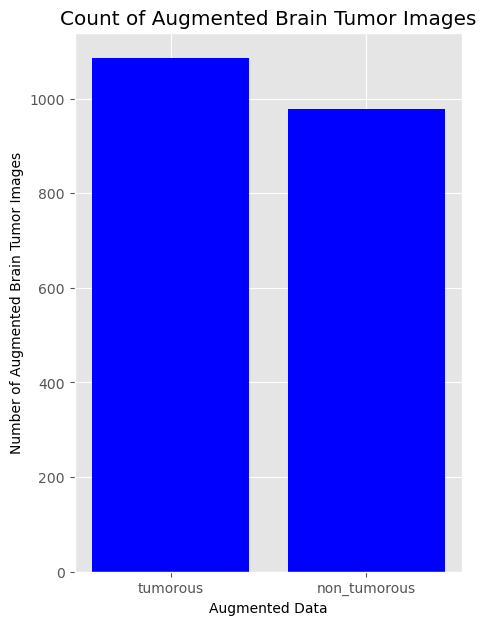

In [18]:
# Create a dictionary with the number of images for each category
data = {'tumorous': number_yes_files, 'non_tumorous': number_no_files}

# Extract the keys (categories) and values (counts) from the dictionary
typex = data.keys()  
values = data.values()

# Create a new figure with a specified size
figure = plt.figure(figsize=(5, 7))

# Generate a bar chart with categories on the x-axis and counts on the y-axis
plt.bar(typex, values, color='blue')  

# Label the x-axis
plt.xlabel("Augmented Data")  
# Label the y-axis
plt.ylabel("Number of Augmented Brain Tumor Images")  
# Set the title of the plot
plt.title('Count of Augmented Brain Tumor Images')  
# Display the plot
plt.show()  

### Data Preprocessing 
- Convert BGR to GRAY
- Gaussian Blur
- Threshold
- Erode
- Dilate
- Find Coutours

In [11]:
def crop_brain_tumor(image, plot=False):
    # 1. Convert BGR to GRAY
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Apply Gaussian Blur to reduce noise and detail
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 3. Apply Threshold to segment the image
    thresholded = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)[1]

    # 4. Apply Erode to reduce small noise and detach objects
    eroded = cv2.erode(thresholded, None, iterations=2)

    # 5. Apply Dilate to enlarge the objects and close small gaps
    dilated = cv2.dilate(eroded, None, iterations=2)

    # 6. Find contours in the dilated image
    contours = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    # Find the largest contour by area
    c = max(contours, key=cv2.contourArea)
    
    # Get extreme points of the contour
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    # Crop the image using the bounding box of the largest contour
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    # Plot images if plot argument is True
    if plot:
        plt.figure()
        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
            
        # Display the cropped image
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

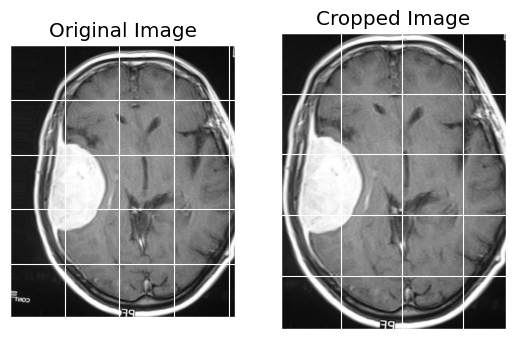

array([[[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 99,  99,  99],
        [148, 148, 148],
        [221, 221, 221]],

       [[ 23,  23,  23],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [104, 104, 104],
        [155, 155, 155],
        [225, 225, 225]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20],
        ...,
        [108, 108, 108],
        [162, 162, 162],
        [226, 226, 226]],

       ...,

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 12,  12,  12],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 11,  11,  11]],

       [[ 13,  13,  13],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]]

In [12]:
# Load the image from the specified path
img = cv2.imread('dataset/augmented_dataset/yes/aug_Y_6_0_8701.jpg')

# Call the crop_brain_tumor function to crop the image and plot results
crop_brain_tumor(img, True)

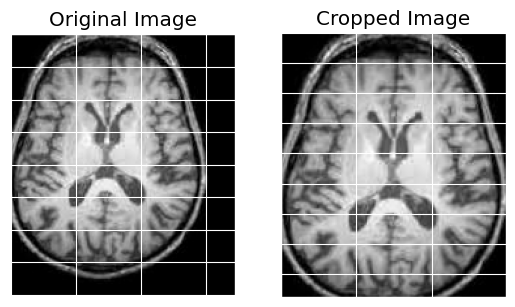

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [13]:
# Load the image from the specified path
img = cv2.imread('dataset/augmented_dataset/no/aug_N_2_0_1492.jpg')

# Call the crop_brain_tumor function to crop the image and plot results
crop_brain_tumor(img, True)

In [14]:
# Define the paths for the two folders containing images of nontumorous ('no') and tumorous ('yes') datasets
folder1 = 'dataset/augmented_dataset/no/'
folder2 = 'dataset/augmented_dataset/yes/'

# Loop through all the filenames in the 'no' folder (nontumorous images)
for filename in os.listdir(folder1):
    # Read the image using OpenCV
    img = cv2.imread(folder1 + filename)
    
    # Crop the brain tumor area from the image using a custom function `crop_brain_tumor`
    # The second argument 'False' could be an indicator for a specific mode or condition in the function
    img = crop_brain_tumor(img, False)
    
    # Save the cropped image back to the original location, overwriting the old image
    cv2.imwrite(folder1 + filename, img)

# Loop through all the filenames in the 'yes' folder (tumorous images)
for filename in os.listdir(folder2):
    # Read the image using OpenCV
    img = cv2.imread(folder2 + filename)
    
    # Crop the brain tumor area from the image using the same custom function
    img = crop_brain_tumor(img, False)
    
    # Save the cropped image back to the original location, overwriting the old image
    cv2.imwrite(folder2 + filename, img)

### Image Loading

In [23]:
def load_data(dir_list, image_size):
    X = []  # List to hold image data
    y = []  # List to hold labels
    
    image_width, image_height = image_size  # Unpack the image size tuple
    
    # Loop through each directory in the directory list
    for directory in dir_list:
        # Loop through each file in the current directory
        for filename in os.listdir(directory):
            # Read the image file
            image = cv2.imread(directory + '/' + filename)
            # Crop the brain tumor area (no plotting)
            image = crop_brain_tumor(image, plot=False)
            # Resize the image to the specified dimensions
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # Normalize the image pixel values to the range [0, 1]
            image = image / 255.00
            # Append the processed image to the list
            X.append(image)
            # Append the label: 1 for 'yes' (tumorous), 0 for 'no' (non-tumorous)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
                
    # Convert the lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data and labels
    X, y = shuffle(X, y)
    
    # Print the number of examples and shapes of the arrays
    print(f"Number of examples is: {len(X)}")
    print(f"X SHAPE is: {X.shape}")
    print(f"y SHAPE is: {y.shape}")
    
    return X, y

In [24]:
# Define the path to the augmented dataset
augmented_path = 'dataset/augmented_dataset/'

# Define the paths for 'yes' (tumorous) and 'no' (non-tumorous) images
augmented_yes = augmented_path + 'yes'
augmented_no = augmented_path + 'no'

# Define the desired width and height for resizing images
IMAGE_WIDTH, IMAGE_HEIGHT = (240, 240)

# Call the load_data function with paths and image size
X, y = load_data([augmented_yes, augmented_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of examples is: 2064
X SHAPE is: (2064, 240, 240, 3)
y SHAPE is: (2064,)


In [25]:
import numpy as np  # Import NumPy for array operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting

def plot_sample_images(X, y, n=50):
    """
    Plot a sample of images from the dataset, separated by labels.
    
    Parameters:
    - X: Array of image data
    - y: Array of labels corresponding to the images
    - n: Number of images to display per label (default is 50)
    """
    
    for label in [0, 1]:  # Iterate over the two possible labels (0 for 'no', 1 for 'yes')
        # Select images corresponding to the current label
        images = X[np.argwhere(y == label).flatten()]  # Use .flatten() to get a 1D array of indices
        n_images = images[:n]  # Take the first 'n' images
        
        # Define the number of columns and rows for the plot grid
        columns_n = 10
        rows_n = int(n / columns_n)  # Calculate the number of rows
        
        # Create a new figure for plotting
        plt.figure(figsize=(20, 10))
        
        # Plot each image in the grid
        i = 1  # Initialize the index for subplot
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)  # Create a subplot
            plt.imshow(image)  # Display the image
            
            # Remove axis ticks and labels
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1  # Move to the next subplot
        
        # Set the title of the entire figure based on the label
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        
        # Display the plot
        plt.show()

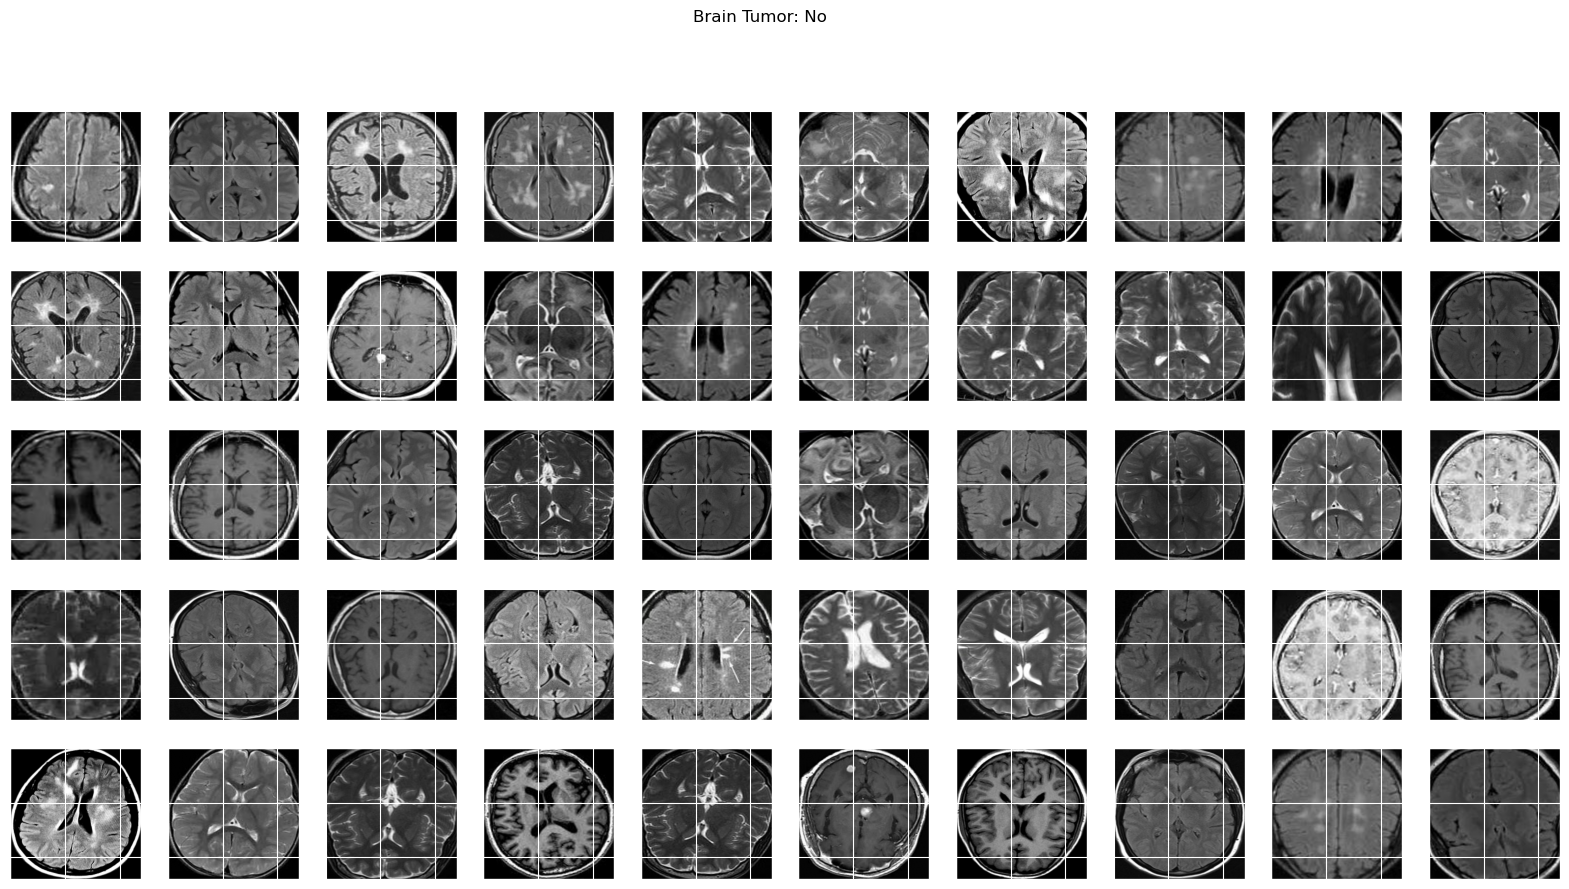

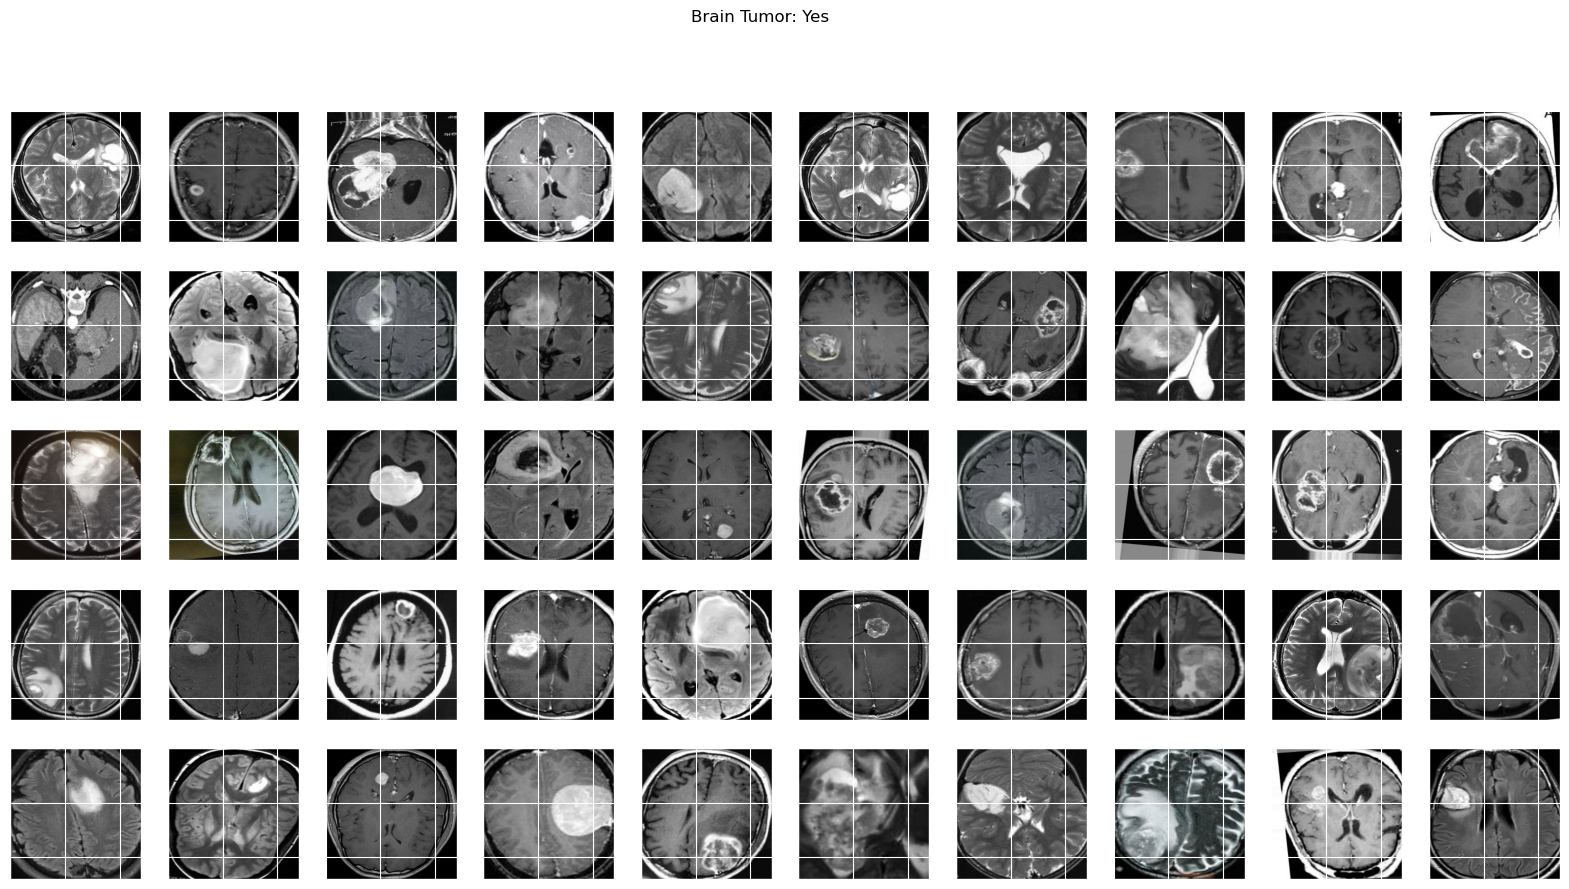

In [26]:
plot_sample_images(X,y)

### Data Spliting 
- Train data
- Test data 
- Validation data 

In [15]:
# Check if the directory 'tumorous_and_nontumorous' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous'):
    
    # Define the base directory name
    base_dir = 'dataset/tumorous_and_nontumorous'
    
    # Create the directory with the specified name
    os.mkdir(base_dir)

In [16]:
# Check if the 'train' directory inside 'dataset/tumorous_and_nontumorous' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/train'):
    
    # Create the path for the 'train' directory by joining the base directory with 'train'
    train_dir = os.path.join(base_dir, 'train')
    
    # Create the 'train' directory
    os.mkdir(train_dir)

# Check if the 'test' directory inside 'dataset/tumorous_and_nontumorous' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/test'):
    
    # Create the path for the 'test' directory by joining the base directory with 'test'
    test_dir = os.path.join(base_dir, 'test')
    
    # Create the 'test' directory
    os.mkdir(test_dir)

# Check if the 'valid' directory inside 'dataset/tumorous_and_nontumorous' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/valid'):
    
    # Create the path for the 'valid' directory by joining the base directory with 'valid'
    valid_dir = os.path.join(base_dir, 'valid')
    
    # Create the 'valid' directory
    os.mkdir(valid_dir)

In [17]:
# Check if the 'tumorous' directory inside 'train' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/train/tumorous'):
    
    # Create the path for the 'tumorous' directory within the 'train' directory
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    
    # Create the 'tumorous' directory inside 'train'
    os.mkdir(infected_train_dir)

# Check if the 'tumorous' directory inside 'test' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/test/tumorous'):
    
    # Create the path for the 'tumorous' directory within the 'test' directory
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    
    # Create the 'tumorous' directory inside 'test'
    os.mkdir(infected_test_dir)

# Check if the 'tumorous' directory inside 'valid' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/valid/tumorous'):
    
    # Create the path for the 'tumorous' directory within the 'valid' directory
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    
    # Create the 'tumorous' directory inside 'valid'
    os.mkdir(infected_valid_dir)

In [18]:
# Check if the 'nontumorous' directory inside 'train' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/train/nontumorous'):
    
    # Create the path for the 'nontumorous' directory within the 'train' directory
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    
    # Create the 'nontumorous' directory inside 'train'
    os.mkdir(healthy_train_dir)

# Check if the 'nontumorous' directory inside 'test' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/test/nontumorous'):
    
    # Create the path for the 'nontumorous' directory within the 'test' directory
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    
    # Create the 'nontumorous' directory inside 'test'
    os.mkdir(healthy_test_dir)

# Check if the 'nontumorous' directory inside 'valid' does not exist
if not os.path.isdir('dataset/tumorous_and_nontumorous/valid/nontumorous'):
    
    # Create the path for the 'nontumorous' directory within the 'valid' directory
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    
    # Create the 'nontumorous' directory inside 'valid'
    os.mkdir(healthy_valid_dir)

In [19]:
# Define the path for the original dataset containing tumorous images
original_dataset_tumorous = os.path.join('dataset/augmented_dataset', 'yes/')

# Define the path for the original dataset containing nontumorous images
original_dataset_nontumorous = os.path.join('dataset/augmented_dataset', 'no/')

In [20]:
# List all files in the 'yes/' directory (containing tumorous images) within the augmented dataset
files = os.listdir('dataset/augmented_dataset/yes/')

# Initialize an empty list to store selected filenames
fnames = []

# Loop through the fist 759 files and add their filenames to the 'fnames' list
for i in range(0, 759):
    fnames.append(files[i])

# Loop through each filename in the 'fnames' list
for fname in fnames:
    # Create the source path for the file in the original dataset (tumorous)
    src = os.path.join(original_dataset_tumorous, fname)
    
    # Create the destination path for the file in the infected training directory
    dst = os.path.join(infected_train_dir, fname)
    
    # Copy the file from the source path to the destination path
    shutil.copyfile(src, dst)

In [21]:
# List all files in the 'yes/' directory (containing tumorous images) within the augmented dataset
files = os.listdir('dataset/augmented_dataset/yes/')

# Initialize an empty list to store selected filenames
fnames = []

# Loop through the files from index 759 to 921 and add their filenames to the 'fnames' list
for i in range(759, 922):
    fnames.append(files[i])

# Loop through each filename in the 'fnames' list
for fname in fnames:
    # Create the source path for the file in the original dataset (tumorous)
    src = os.path.join(original_dataset_tumorous, fname)
    
    # Create the destination path for the file in the infected test directory
    dst = os.path.join(infected_test_dir, fname)
    
    # Copy the file from the source path to the destination path
    shutil.copyfile(src, dst)

In [22]:
# List all files in the 'yes/' directory (containing tumorous images) within the augmented dataset
files = os.listdir('dataset/augmented_dataset/yes/')

# Initialize an empty list to store selected filenames
fnames = []

# Loop through the files from index 922 to 1084 and add their filenames to the 'fnames' list
for i in range(922, 1085):
    fnames.append(files[i])

# Loop through each filename in the 'fnames' list
for fname in fnames:
    # Create the source path for the file in the original dataset (tumorous)
    src = os.path.join(original_dataset_tumorous, fname)
    
    # Create the destination path for the file in the infected validation directory
    dst = os.path.join(infected_valid_dir, fname)
    
    # Copy the file from the source path to the destination path
    shutil.copyfile(src, dst)

In [23]:
# Training Data ---> 80% 
# Testing Data ---> 10%
# Validation Data ---> 10%

In [24]:
# List all files in the 'no/' directory (containing nontumorous images) within the augmented dataset
files = os.listdir('dataset/augmented_dataset/no/')

# Initialize an empty list to store selected filenames
fnames = []

# Loop through the first 686 files and add their filenames to the 'fnames' list
for i in range(0, 686):
    fnames.append(files[i])

# Loop through each filename in the 'fnames' list
for fname in fnames:
    # Create the source path for the file in the original dataset (nontumorous)
    src = os.path.join(original_dataset_nontumorous, fname)
    
    # Create the destination path for the file in the healthy training directory
    dst = os.path.join(healthy_train_dir, fname)
    
    # Copy the file from the source path to the destination path
    shutil.copyfile(src, dst)

In [25]:
# List all files in the 'no/' directory (containing nontumorous images) within the augmented dataset
files = os.listdir('dataset/augmented_dataset/no/')

# Initialize an empty list to store selected filenames
fnames = []

# Loop through the files from index 686 to 832 and add their filenames to the 'fnames' list
for i in range(686, 833):
    fnames.append(files[i])

# Loop through each filename in the 'fnames' list
for fname in fnames:
    # Create the source path for the file in the original dataset (nontumorous)
    src = os.path.join(original_dataset_nontumorous, fname)
    
    # Create the destination path for the file in the healthy test directory
    dst = os.path.join(healthy_test_dir, fname)
    
    # Copy the file from the source path to the destination path
    shutil.copyfile(src, dst)

In [26]:
# List all files in the 'no/' directory (containing nontumorous images) within the augmented dataset
files = os.listdir('dataset/augmented_dataset/no/')

# Initialize an empty list to store selected filenames
fnames = []

# Loop through the files from index 833 to 978 and add their filenames to the 'fnames' list
for i in range(833, 979):
    fnames.append(files[i])

# Loop through each filename in the 'fnames' list
for fname in fnames:
    # Create the source path for the file in the original dataset (nontumorous)
    src = os.path.join(original_dataset_nontumorous, fname)
    
    # Create the destination path for the file in the healthy validation directory
    dst = os.path.join(healthy_valid_dir, fname)
    
    # Copy the file from the source path to the destination path
    shutil.copyfile(src, dst)

### Model Building

In [27]:
# Create an ImageDataGenerator instance for training data with various augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Scale pixel values to the range [0, 1]
    horizontal_flip=0.4,    # Apply horizontal flip with a probability of 40%
    vertical_flip=0.4,      # Apply vertical flip with a probability of 40%
    rotation_range=40,      # Randomly rotate images up to 40 degrees
    shear_range=0.2,        # Apply random shearing transformations with a range of 20%
    width_shift_range=0.4,  # Randomly shift images horizontally by up to 40% of the width
    height_shift_range=0.4, # Randomly shift images vertically by up to 40% of the height
    fill_mode='nearest'     # Fill in missing pixels with the nearest pixel values
)

# Create an ImageDataGenerator instance for test data with no augmentation, only rescaling
test_data_gen = ImageDataGenerator(
    rescale=1./255          # Scale pixel values to the range [0, 1]
)

# Create an ImageDataGenerator instance for validation data with no augmentation, only rescaling
valid_data_gen = ImageDataGenerator(
    rescale=1./255          # Scale pixel values to the range [0, 1]
)

In [28]:
# Generate batches of augmented data for the training set from the specified directory
train_generator = train_datagen.flow_from_directory(
    'dataset/tumorous_and_nontumorous/train/',  # Directory for training data
    batch_size=32,                             # Number of images to be generated in each batch
    target_size=(240, 240),                    # Resize all images to 240x240 pixels
    class_mode='categorical',                  # Use categorical mode for multi-class classification
    shuffle=True,                              # Shuffle the data to ensure randomness
    seed=42,                                   # Seed for reproducibility
    color_mode='rgb'                           # Use RGB color mode for images
)

Found 1445 images belonging to 2 classes.


In [29]:
# Generate batches of augmented data for the test set from the specified directory
test_generator = train_datagen.flow_from_directory(
    'dataset/tumorous_and_nontumorous/test/',   # Directory for test data
    batch_size=32,                              # Number of images to be generated in each batch
    target_size=(240, 240),                     # Resize all images to 240x240 pixels
    class_mode='categorical',                   # Use categorical mode for multi-class classification
    shuffle=True,                               # Shuffle the data to ensure randomness
    seed=42,                                    # Seed for reproducibility
    color_mode='rgb'                            # Use RGB color mode for images
)

Found 310 images belonging to 2 classes.


In [30]:
# Generate batches of augmented data for the validation set from the specified directory
valid_generator = train_datagen.flow_from_directory(
    'dataset/tumorous_and_nontumorous/valid/',  # Directory for validation data
    batch_size=32,                              # Number of images to be generated in each batch
    target_size=(240, 240),                     # Resize all images to 240x240 pixels
    class_mode='categorical',                   # Use categorical mode for multi-class classification
    shuffle=True,                               # Shuffle the data to ensure randomness
    seed=42,                                    # Seed for reproducibility
    color_mode='rgb'                            # Use RGB color mode for images
)

Found 309 images belonging to 2 classes.


In [31]:
# Retrieve the class indices (labels) from the training generator
class_labels = train_generator.class_indices

# Reverse the class indices dictionary to get the class names as keys and their indices as values
class_name = {value: key for (key, value) in class_labels.items()}

In [32]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [33]:
# Load the VGG19 model with pretrained weights from ImageNet, excluding the top (fully connected) layers
base_model = VGG19(
    input_shape=(240, 240, 3),  # Define input shape for the model as 240x240 pixels with 3 color channels (RGB)
    include_top=False,          # Exclude the top fully connected layers to add custom layers for fine-tuning
    weights='imagenet'          # Use pretrained weights from the ImageNet dataset
)

# Freeze all layers in the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

# Get the output of the base model
x = base_model.output

# Flatten the output from the base model to feed into the fully connected layers
flat = Flatten()(x)

# Add a fully connected layer with 4608 units and ReLU activation function
class_1 = Dense(4608, activation='relu')(flat)

# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting
drop_out = Dropout(0.2)(class_1)

# Add another fully connected layer with 1152 units and ReLU activation function
class_2 = Dense(1152, activation='relu')(drop_out)

# Add the output layer with 2 units (for binary classification) and softmax activation
output = Dense(2, activation='softmax')(class_2)

# Create the final model by combining the base model's input with the newly added output layer
model_01 = Model(base_model.input, output)

# Print the model summary to show the architecture and the number of parameters
model_01.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [38]:
# Define the file path to save the best model
filepath = 'model.keras'

# Create an EarlyStopping callback to stop training when validation loss does not improve
es = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    verbose=1,           # Print messages when training stops
    mode='min',          # Stop when the monitored value (val_loss) stops decreasing
    patience=4           # Number of epochs to wait for improvement before stopping
)

# Create a ModelCheckpoint callback to save the best model based on validation loss
cp = ModelCheckpoint(
    filepath,             # Filepath to save the model
    monitor='val_loss',   # Monitor the validation loss
    verbose=1,            # Print messages when saving the model
    save_best_only=True,  # Save only the model with the best validation loss
    save_weights_only=False, # Save the entire model (architecture + weights)
    mode='auto',          # Automatically determine if the monitored quantity should be minimized or maximized
    save_freq='epoch'     # Save the model at the end of every epoch
)

# Create a ReduceLROnPlateau callback to reduce the learning rate when the validation accuracy plateaus
lrr = ReduceLROnPlateau(
    monitor='val_accuarcy',  # Monitor the validation accuracy
    patience=3,              # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,               # Print messages when reducing the learning rate
    factor=0.5,              # Factor by which the learning rate will be reduced. new_lr = lr * factor
    min_lr=0.0001            # Minimum learning rate after reduction
)

In [39]:
# Initialize the Stochastic Gradient Descent (SGD) optimizer with specific parameters
sgd = SGD(
    learning_rate=0.0001,  # Initial learning rate for the optimizer
    decay=1e-6,            # Learning rate decay over each update; this reduces the learning rate over time
    momentum=0.9,          # Momentum parameter to accelerate gradient vectors in the right directions
    nesterov=True          # Use Nesterov momentum, which improves convergence by incorporating a lookahead step
)

# Compile the model with the specified loss function, optimizer, and evaluation metrics
model_01.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification problems
    optimizer=sgd,                    # Optimizer to use for training the model
    metrics=['accuracy']              # Metrics to evaluate during training and testing; here, we use accuracy
)

C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [40]:
# Train the model using the training data generator and validate it using the validation data generator
history_01 = model_01.fit(
    train_generator,           # Training data generator
    steps_per_epoch=10,        # Number of steps (batches of samples) to draw from the generator for each epoch
    epochs=2,                  # Number of epochs to train the model
    callbacks=[es, cp, lrr],   # List of callbacks for early stopping, model checkpointing, and learning rate reduction
    validation_data=valid_generator  # Validation data generator for evaluating the model after each epoch
)

Epoch 1/2


C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.4582 - loss: 0.7877 
Epoch 1: val_loss improved from inf to 0.68333, saving model to model.keras


C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 474s 48s/step - accuracy: 0.4594 - loss: 0.7857 - val_accuracy: 0.5761 - val_loss: 0.6833 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.5692 - loss: 0.6882 
Epoch 2: val_loss did not improve from 0.68333
10/10 ━━━━━━━━━━━━━━━━━━━━ 394s 36s/step - accuracy: 0.5660 - loss: 0.6894 - val_accuracy: 0.5210 - val_loss: 0.7075 - learning_rate: 1.0000e-04


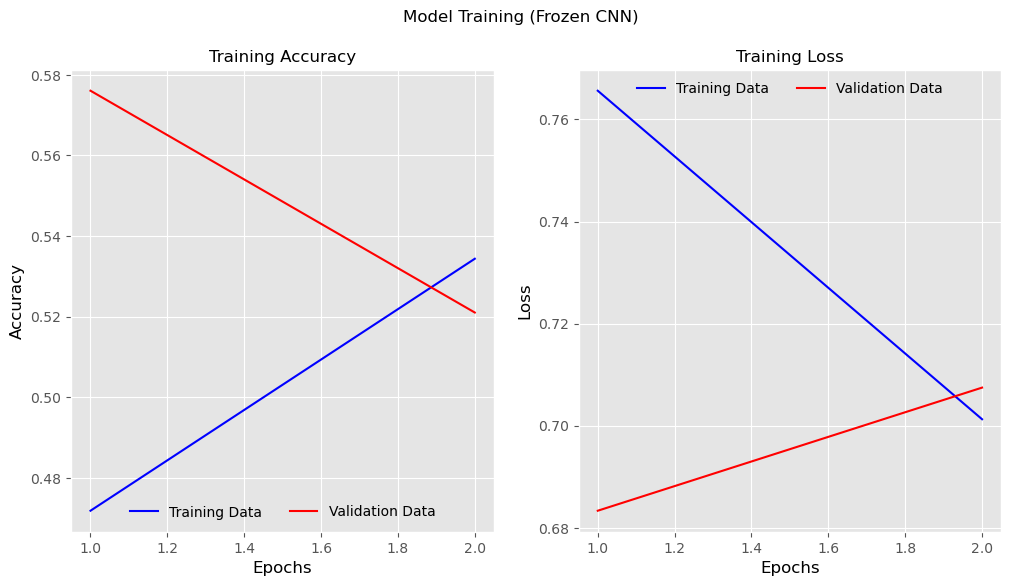

In [41]:
# Create a figure with two subplots (ax1 and ax2) arranged in a single row with 2 columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Set a common title for the entire figure
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)

# Calculate the number of epochs from the training history
max_epoch = len(history_01.history['accuracy']) + 1

# Create a list of epochs to use as the x-axis for plotting
epochs_list = list(range(1, max_epoch))

# Plot the training accuracy over epochs on the first subplot (ax1)
ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
# Plot the validation accuracy over epochs on the first subplot (ax1)
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
# Set the title, x-label, and y-label for the first subplot (ax1)
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
# Display the legend on the first subplot
ax1.legend(frameon=False, loc='lower center', ncol=2)

# Plot the training loss over epochs on the second subplot (ax2)
ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
# Plot the validation loss over epochs on the second subplot (ax2)
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
# Set the title, x-label, and y-label for the second subplot (ax2)
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
# Display the legend on the second subplot
ax2.legend(frameon=False, loc='upper center', ncol=2)

# Save the figure as a JPEG image with a specified format, DPI, and tight bounding box
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [47]:
# Check if the directory 'model_weights/' exists; if not, create it
if not os.path.isdir('models/'):
    os.mkdir('models/')  # Create the directory to store model weights

# Save the weights of the model 'model_01' to the specified file path
model_01.save_weights(
    filepath="models/vgg19_model_01.weights.h5",  # File path to save the weights
    overwrite=True                               # Overwrite the file if it already exists
)

In [48]:
# Load the previously saved weights into the model 'model_01'
model_01.load_weights("models/vgg19_model_01.weights.h5")

# Evaluate the model on the validation data to measure its performance
vgg_val_eval_01 = model_01.evaluate(valid_generator)

# Evaluate the model on the test data to measure its generalization performance
vgg_test_eval_01 = model_01.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 14s/step - accuracy: 0.5572 - loss: 0.6964


C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 140s 14s/step - accuracy: 0.4840 - loss: 0.7438


In [49]:
# Print the validation loss from the evaluation results
print(f'Validation Loss: {vgg_val_eval_01[0]}')

# Print the validation accuracy from the evaluation results
print(f'Validation Acc: {vgg_val_eval_01[1]}')

# Print the testing loss from the evaluation results
print(f'Testing Loss: {vgg_test_eval_01[0]}')

# Print the testing accuracy from the evaluation results
print(f'Testing Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.7096197605133057
Validation Acc: 0.5339806079864502
Testing Loss: 0.7483222484588623
Testing Acc: 0.47741934657096863


In [ ]:
# Retrieve the filenames of the images from the test generator
filenames = test_generator.filenames

# Calculate the number of samples in the test set
nb_sample = len(filenames)

# Predict the classes for the test data using the model
# 'steps' should match the number of samples to ensure predictions for the entire dataset
vgg_prediction_01 = model_01.predict(test_generator, steps=nb_sample, verbose=1)

# Convert the predicted probabilities to class labels by finding the index of the highest probability
y_pred = np.argmax(vgg_prediction_01, axis=1)

### Increamental unfreezing and fine tuning

In [50]:
# Initialize the VGG19 model without the top (fully connected) layers and with the specified input shape
base_model = VGG19(
    include_top=False,        # Exclude the top fully connected layers to access only the convolutional base
    input_shape=(240, 240, 3) # Input shape for the model: 240x240 pixels with 3 color channels (RGB)
)

# Retrieve the names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]

# Output the names of the layers in the base model
base_model_layer_names

['input_layer_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [52]:
# Initialize the VGG19 model without the top (fully connected) layers and with the specified input shape
base_model = VGG19(
    include_top=False,        # Exclude the top fully connected layers to use only the convolutional base
    input_shape=(240, 240, 3) # Input shape: 240x240 pixels with 3 color channels (RGB)
)

# Retrieve the names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]

# Display the names of the layers in the base model
base_model_layer_names

# Get the output tensor from the base model
x = base_model.output

# Flatten the output tensor to feed into fully connected layers
flat = Flatten()(x)

# Add a fully connected layer with 4608 units and ReLU activation function
class_1 = Dense(4608, activation='relu')(flat)

# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting
drop_out = Dropout(0.2)(class_1)

# Add another fully connected layer with 1152 units and ReLU activation function
class_2 = Dense(1152, activation='relu')(drop_out)

# Add the final output layer with 2 units (for binary classification) and softmax activation
output = Dense(2, activation='softmax')(class_2)

# Create the new model by combining the base model's input with the new output layer
model_02 = Model(base_model.inputs, output)

# Load the weights from a previously saved model into the new model
model_02.load_weights('models/vgg19_model_01.weights.h5')

# Initialize a flag to control which layers are trainable
set_trainable = False

# Loop through all layers in the base model
for layer in base_model.layers:
    # Check if the layer's name is in the specified list of layers to train
    if layer.name in ['block5_conv4', 'block5_conv3']:
        set_trainable = True
    # Set the layer's trainable status based on the flag
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Print the summary of the new model to review its architecture and parameters
print(model_02.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [53]:
# Initialize the Stochastic Gradient Descent (SGD) optimizer with specific parameters
sgd = SGD(
    learning_rate=0.0001,  # Set the learning rate for the optimizer; this controls how much to adjust weights during training
    decay=1e-6,            # Apply a decay to the learning rate over each update; helps in reducing the learning rate over time
    momentum=0.9,          # Use momentum to accelerate gradients in the right direction and smooth out the optimization
    nesterov=True          # Use Nesterov accelerated gradient, which improves convergence by looking ahead at the gradient
)

# Compile the model with the specified loss function, optimizer, and evaluation metrics
model_02.compile(
    loss='categorical_crossentropy',  # Specify the loss function for multi-class classification problems
    optimizer=sgd,                    # Use the initialized SGD optimizer for training the model
    metrics=['accuracy']              # Track accuracy as the evaluation metric during training and evaluation
)

C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [54]:
history_02 = model_02.fit(
    train_generator, 
    steps_per_epoch=10, 
    epochs = 2, 
    callbacks=[es,cp,lrr], 
    validation_data=valid_generator
)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.5932 - loss: 0.6791 
Epoch 1: val_loss did not improve from 0.68333
10/10 ━━━━━━━━━━━━━━━━━━━━ 447s 37s/step - accuracy: 0.5913 - loss: 0.6802 - val_accuracy: 0.5340 - val_loss: 0.7137 - learning_rate: 1.0000e-04
Epoch 2/2


C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.5200 - loss: 0.7183 
Epoch 2: val_loss improved from 0.68333 to 0.64722, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 688s 74s/step - accuracy: 0.5213 - loss: 0.7166 - val_accuracy: 0.6375 - val_loss: 0.6472 - learning_rate: 1.0000e-04


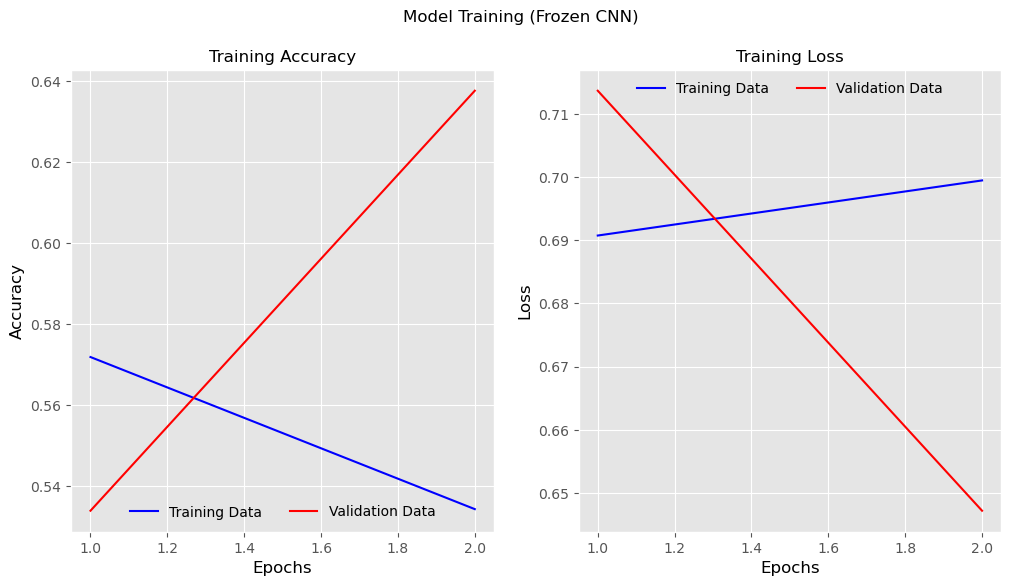

In [56]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [58]:
if not os.path.isdir('models/'):
    os.mkdir('models/')
model_02.save_weights(filepath="models/vgg19_model_02.weights.h5", overwrite=True)

In [59]:
model_02.load_weights("models/vgg19_model_02.weights.h5")
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 168s 16s/step - accuracy: 0.6722 - loss: 0.6388
10/10 ━━━━━━━━━━━━━━━━━━━━ 159s 16s/step - accuracy: 0.4896 - loss: 0.7123


### Unfreezing the entire network

In [60]:
# Initialize the VGG19 model without the top (fully connected) layers and with the specified input shape
base_model = VGG19(
    include_top=False,        # Exclude the top fully connected layers to use only the convolutional base
    input_shape=(240, 240, 3) # Input shape: 240x240 pixels with 3 color channels (RGB)
)

# Retrieve the names of all layers in the base model
base_model_layer_names = [layer.name for layer in base_model.layers]

# Output the names of the layers in the base model for review
base_model_layer_names

# Get the output tensor from the base model
x = base_model.output

# Flatten the output tensor to feed into fully connected layers
flat = Flatten()(x)

# Add a fully connected layer with 4608 units and ReLU activation function
class_1 = Dense(4608, activation='relu')(flat)

# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting
drop_out = Dropout(0.2)(class_1)

# Add another fully connected layer with 1152 units and ReLU activation function
class_2 = Dense(1152, activation='relu')(drop_out)

# Add the final output layer with 2 units (for binary classification) and softmax activation
output = Dense(2, activation='softmax')(class_2)

# Create the new model by combining the base model's input with the new output layer
model_03 = Model(base_model.inputs, output)

# Load the weights from a previously saved model into the new model
model_03.load_weights('models/vgg19_model_02.weights.h5')

# Initialize the Stochastic Gradient Descent (SGD) optimizer with specific parameters
sgd = SGD(
    learning_rate=0.0001,  # Set the learning rate for the optimizer
    decay=1e-6,            # Apply a decay to the learning rate over each update
    momentum=0.9,          # Use momentum to smooth out the optimization
    nesterov=True          # Use Nesterov accelerated gradient for improved convergence
)

# Compile the model with the specified loss function, optimizer, and evaluation metrics
model_03.compile(
    loss='categorical_crossentropy',  # Specify the loss function for multi-class classification problems
    optimizer=sgd,                    # Use the initialized SGD optimizer
    metrics=['accuracy']              # Track accuracy as the evaluation metric
)
print(model_03.summary())

C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

None


In [61]:
history_03 = model_03.fit(
    train_generator, 
    steps_per_epoch=10, 
    epochs = 2, 
    callbacks=[es,cp,lrr], 
    validation_data=valid_generator
)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 73s/step - accuracy: 0.5282 - loss: 0.7251  
Epoch 1: val_loss did not improve from 0.64722
10/10 ━━━━━━━━━━━━━━━━━━━━ 1252s 95s/step - accuracy: 0.5294 - loss: 0.7231 - val_accuracy: 0.5631 - val_loss: 0.7014 - learning_rate: 1.0000e-04
Epoch 2/2


C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 75s/step - accuracy: 0.5752 - loss: 0.7029  
Epoch 2: val_loss improved from 0.64722 to 0.63008, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1089s 112s/step - accuracy: 0.5812 - loss: 0.6992 - val_accuracy: 0.6440 - val_loss: 0.6301 - learning_rate: 1.0000e-04


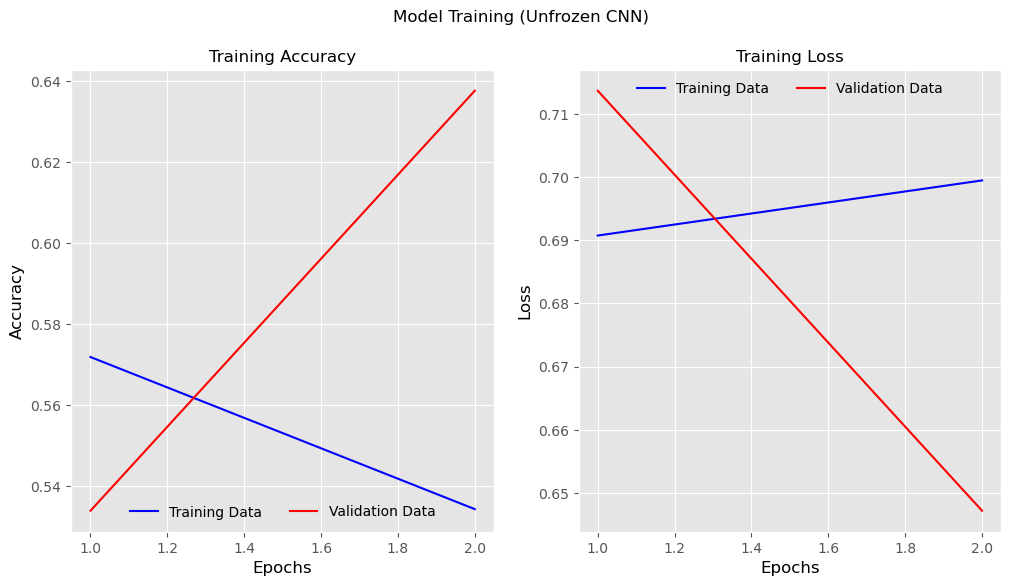

In [62]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Unfrozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_unfrozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [64]:
if not os.path.isdir('models/'):
    os.mkdir('models/')
model_03.save_weights(filepath="models/vgg19_model_03.weights.h5", overwrite=True)

In [65]:
model_03.load_weights("models/vgg19_model_03.weights.h5")
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 204s 14s/step - accuracy: 0.6355 - loss: 0.6279
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 14s/step - accuracy: 0.5038 - loss: 0.6986
